In [1]:
import sys
import os 
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact
import ipywidgets as widgets

%autosave 5

Autosaving every 5 seconds


In [2]:
"""gather the pre-computed results from figshare"""

download_data = True

if download_data:
    # download data 
    img_dl_cmd = 'curl --header "Host: s3-eu-west-1.amazonaws.com" --header "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header "Accept-Language: en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,zh-TW;q=0.6,ja;q=0.5" "https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/13474631/retrieval.tar.gz" -o "retrieval.tar.gz" -L'
    _ = os.system(img_dl_cmd)

    # create a cache dir 
    if not os.path.exists('cache'):
        os.makedirs('cache')

    # move the file to cache    
    if os.path.exists('retrieval.tar.gz'):    
        _ = os.system('mv retrieval.tar.gz cache/')
    else: 
        assert os.path.exists('cache/retrieval.tar.gz')

    # unzip the folder
    _ = os.system('tar -xzf cache/retrieval.tar.gz -C cache/')

temp_plt_path = os.path.join('cache/retrieval')
assert os.path.exists(temp_plt_path), 'oops you need to fetch my data 1st...'    
print('Fetch pre-computed results - Done!')

Fetch pre-computed results - Done!


In [3]:
"""
constant
"""
POSSIBLE_RULE_TYPES = ['null', 'demand', 'inhibit', 'demand+inhibit']
# simulation parameters 
chk_siz_list = [4, 8, 16, 32, 64]
min_mat_list = [0, 1, 2, 4, 8, 16, 32, 64]
max_mis_list = [0, 1, 2, 4, 8, 16, 32, 64]
# max_mis_list = [0, 1]
ncks = len(chk_siz_list)
nm1s = len(min_mat_list)
nm2s = len(max_mis_list)

"""
fixed parameters
"""
# event parameters
n_params = 64
event_len = 512
# n_branches = 3
event_len_trunc = 64 
ms_deday = 0.0

# sample size 
n_sims = 500

n_qs = event_len // event_len_trunc
model_param_lists = [chk_siz_list, min_mat_list, max_mis_list]

"""
manipulated parameters
"""
ambiguity_all = [.25]
noise_all = [0, 0.01]
n_retrievals_all = [1, 3]
mismatch_sensitivity_all = [0, 1.0]
penalty_strenth_all = [0, 1]
plt_format = '.png'

In [4]:
# build the param_tuple -> imshow mapping
def switch_img(ambiguity, noise, n_retrievals, mismatch_sensitivity, fixed_m2_val, penalty_strenth):
    # fetch data 
    img_param_tup = (
        ambiguity, noise, n_retrievals, mismatch_sensitivity, fixed_m2_val, penalty_strenth
    )
    fname = 'amb_%.2f_noise_%.3f_nRs_%d_mms_%d_m2v_%d_ps_%1.f' % img_param_tup + plt_format
    fpath = os.path.join(temp_plt_path, fname)
    # build key-image dict 
    imgs = mpimg.imread(fpath)
    # show data 
    ax.imshow(imgs)
    f.tight_layout()

<IPython.core.display.Javascript object>


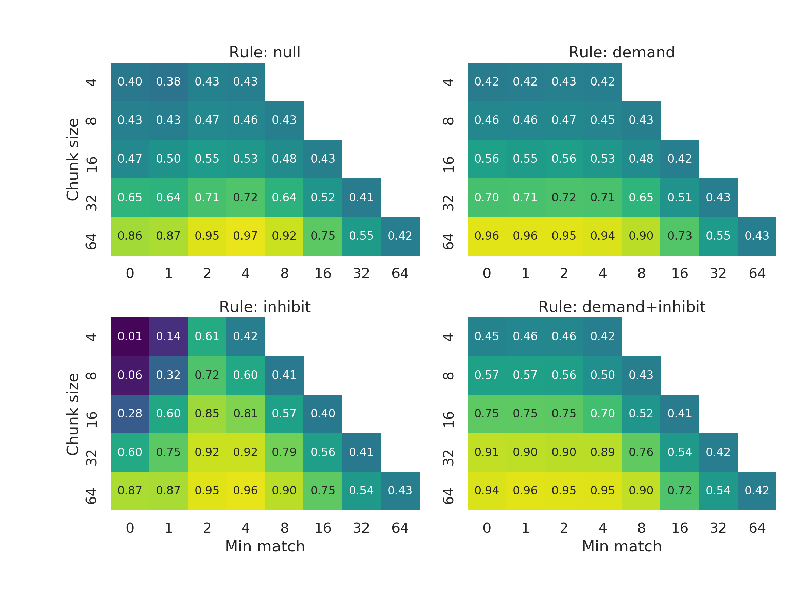

interactive(children=(ToggleButtons(description='ambiguity', options=(0.25,), value=0.25), ToggleButtons(descr…

<function __main__.switch_img(ambiguity, noise, n_retrievals, mismatch_sensitivity, fixed_m2_val, penalty_strenth)>

In [5]:
%matplotlib notebook

f, ax = plt.subplots(1,1, figsize = (8, 6))
ax.axis('off')

# set up the plot 
interact(
    switch_img,
    ambiguity=widgets.ToggleButtons(
        options=ambiguity_all, 
        value=ambiguity_all[0], 
        description='ambiguity', 
        disabled=False
    ),
    noise=widgets.ToggleButtons(
        options=noise_all, 
        value=noise_all[0], 
        description='noise', 
        disabled=False
    ),
    n_retrievals=widgets.ToggleButtons(
        options=n_retrievals_all, 
        value=n_retrievals_all[-1], 
        description='n_retrievals', 
        disabled=False
    ),
    mismatch_sensitivity=widgets.ToggleButtons(
        options=mismatch_sensitivity_all, 
        value=mismatch_sensitivity_all[-1], 
        description='mismatch_sensitivity', 
        disabled=False
    ),
    fixed_m2_val = widgets.SelectionSlider(
        options=max_mis_list, 
        value=max_mis_list[0],
        description='Max-mismatch', 
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True
    ), 
    penalty_strenth=widgets.ToggleButtons(
        options=penalty_strenth_all, 
        value=penalty_strenth_all[-1],
        description='Penalty strenth', 
        disabled=False,
    ), 
)